In [1]:
#extract meta data of special subject id from idenity_meta.csv file
import os
import pandas as pd

subjectid = os.listdir('D:\cnnface/female_male_test_51_addnoise/pure')

subject_meta = pd.read_csv('D:/VGGface2/meta_data/identity_meta.csv',error_bad_lines=False)

for i,subid in enumerate(subjectid):
    if i == 0:
        subject_meta_part = subject_meta[subject_meta["Class_ID"].str.contains(subid)]
    else:
        subject_meta_tmp = subject_meta[subject_meta["Class_ID"].str.contains(subid)]
        subject_meta_part = pd.concat([subject_meta_part,subject_meta_tmp])

b'Skipping line 1308: expected 5 fields, saw 6\nSkipping line 1365: expected 5 fields, saw 6\nSkipping line 1413: expected 5 fields, saw 6\nSkipping line 1451: expected 5 fields, saw 6\nSkipping line 1729: expected 5 fields, saw 6\nSkipping line 1814: expected 5 fields, saw 6\nSkipping line 1854: expected 5 fields, saw 6\nSkipping line 2151: expected 5 fields, saw 6\nSkipping line 2243: expected 5 fields, saw 6\nSkipping line 2988: expected 5 fields, saw 6\nSkipping line 3308: expected 5 fields, saw 6\nSkipping line 4201: expected 5 fields, saw 6\nSkipping line 4401: expected 5 fields, saw 6\nSkipping line 4404: expected 5 fields, saw 6\nSkipping line 4656: expected 5 fields, saw 6\nSkipping line 5056: expected 5 fields, saw 6\nSkipping line 7238: expected 5 fields, saw 6\nSkipping line 7309: expected 5 fields, saw 6\n'


In [2]:
#Count the number of female pictures or male pictures
subject_fe_meta_part = subject_meta_part[subject_meta_part[" Gender"].str.contains(' f')]
subject_ma_meta_part = subject_meta_part[subject_meta_part[" Gender"].str.contains(' m')]

female_id = list(subject_fe_meta_part["Class_ID"])
male_id = list(subject_ma_meta_part["Class_ID"])

prepath = 'D:\cnnface/female_male_test_51_addnoise/pure'
female_path = [prepath +'/'+ id for id in female_id]
male_path = [prepath + '/' + id for id in male_id]

pic_num = [len(os.listdir(path)) for path in female_path]
female_pic_num = sum(pic_num)
pic_num = [len(os.listdir(path)) for path in male_path]
male_pic_num = sum(pic_num)

In [5]:
print(female_id)
print(male_id)
fe = set(female_id)
ma = set(male_id)
sid = set(os.listdir('D:\cnnface/female_male_test_51_addnoise/pure'))
print(sid-fe-ma)

print(female_pic_num)
print(male_pic_num)

['n001181', 'n001333', 'n001459', 'n001617', 'n002085', 'n002285', 'n002464', 'n002724', 'n003381', 'n004029', 'n004626', 'n004655', 'n005458', 'n005591', 'n006309', 'n008049', 'n008148', 'n008391']
['n000004', 'n000006', 'n000061', 'n000081', 'n000142', 'n000154', 'n000551', 'n000598', 'n000866', 'n001479', 'n001891', 'n001967', 'n002002', 'n002332', 'n002744', 'n003177', 'n004122', 'n004535', 'n005265', 'n005653', 'n006208', 'n006815', 'n006912', 'n007311', 'n007338', 'n007353', 'n007425', 'n007873', 'n008373', 'n008455', 'n008911', 'n009017']
{'n003346'}
7481
13592


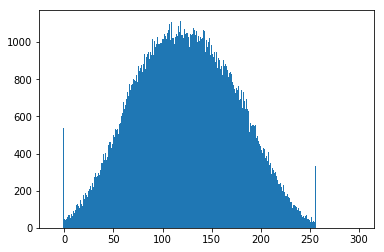

In [32]:
# plot the frequence of image
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

image = Image.open('D:/cnnface/noise_picture/moise_picture_test/noise_img_99006.jpg')
image_array = np.array(image)

image_array = image_array.reshape(-1)

bins = np.linspace(-10,300,3b10)
plt.hist(image_array,bins)
plt.show()


In [15]:
# read face pictures from folder and add noise

import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

pic = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/mft_save_rgb.jpg')
pic_arr = np.array(pic)
print(pic_arr.dtype)

sigma_list = np.arange(0,101,10).astype('uint8')
print(sigma_list)

for i,sigma in enumerate(sigma_list):
    sigma = sigma
    print(sigma)
    
    noise_image = pic_arr + np.random.randn(pic_arr.shape[0],pic_arr.shape[1],
                                            pic_arr.shape[2]) * sigma
    img_noise = Image.fromarray(noise_image.astype('uint8'))
    plt.show(img_noise)
    img_noise.save('D:\cnnface/female_male_test_51_addnoise\Face_template/0001_01_noise_{}.jpg'.format(i))

uint8
[  0  10  20  30  40  50  60  70  80  90 100]
0
10
20
30
40
50
60
70
80
90
100


In [ ]:
#using the skimage package to add noise
import skimage
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

pic = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/mft_rgb.png')
pic_arr = np.array(pic)

var = ((np.arange(0,101,10)).astype('uint8')/255)**2
print(var)
for i,v in enumerate(var):
    noise_gs_img = skimage.util.random_noise(pic_arr,mode='gaussian',clip=False,var=v)
    noise_gs_img = Image.fromarray((noise_gs_img*255).astype('uint8'))
    noise_gs_img.save('D:/cnnface/female_male_test_51_addnoise/Face_template/a_{}.png'.format(i))

一种就是很害怕的感觉，害怕出来结果意料之外。
一个科研人不应该害怕未知，不应该自己的结果。因为实验中与理论不符，意料之外的结果才有可能掀开了真理的帘子。
开拓未知的领域，验证未知，解释未知，变成人类所掌握的技术和理论，让冰冷地客观世界变得亲切和善。
与人相伴

In [ ]:
#using the skimage package to add noise for 51 subjects
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

picpath = 'D:\cnnface/female_male_test_51'
f = pd.read_csv('D:/cnnface/female_male_test_51_addnoise/51.csv',skiprows=1)
img_path = np.array(f['stimID'])

var = [0.001,0.005,0.01,0.02]

for img_p in img_path:
    picimg = Image.open(os.path.join(picpath, img_p))
    pic = Image.open(img_p)
    pic_arr = np.array(pic)
    subid = img_p.split('/')[0]
    suffix = img_p.split('/')[1]
    
    for v in var:
        noise_gs_img = skimage.util.random_noise(pic_arr,mode='gaussian',clip=False,var=v)
        noise_gs_img = Image.fromarray((noise_gs_img*255).astype('uint8'))
        noise_gs_img.save('D:/cnnface/female_male_test_51_addnoise/{}/{}/{}'.format(v,subid,suffix))

In [3]:
#create folder in batchs
import os, sys
path1 = 'D:\VGGface2\overlap_vggface1_2/'  #指定名称文件夹所在路径
path2 = 'D:/cnnface/female_male_test_51_addnoise/noise_0.05/'    #新建文件夹所在路径
 
def MkDir():
    dirs = os.listdir(path1)
    for dir in dirs:
        file_name = path2 + str(dir)
        os.mkdir(file_name)
        
MkDir()

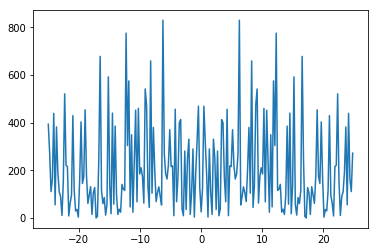

In [105]:
#plot power specturm density 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#pic = Image.open('')
#data = np.array(pic)
data = np.random.randn(224) 
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 50

freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])



In [ ]:
import os
subjectid = os.listdir('D:\cnnface/female_male_test_51_addnoise\pure')
female_id = ['n001181', 'n001333', 'n001459', 'n001617', 'n002085', 'n002285',
             'n002464', 'n002724', 'n003381', 'n004029', 'n004626', 'n004655', 
             'n005458', 'n005591', 'n006309', 'n008049', 'n008148', 'n008391']
male_id = ['n000004', 'n000006', 'n000061', 'n000081', 'n000142', 'n000154', 
           'n000551', 'n000598', 'n000866', 'n001479', 'n001891', 'n001967', 
           'n002002', 'n002332', 'n002744', 'n003177', 'n003346', 'n004122', 
           'n004535', 'n005265', 'n005653', 'n006208', 'n006815', 'n006912', 
           'n007311', 'n007338', 'n007353', 'n007425', 'n007873', 'n008373', 
           'n008455', 'n008911', 'n009017']

female_list = [subjectid.index(i) for i in female_id]
male_list = [subjectid.index(i) for i in male_id]

a = output1[0]
label = output1[1]

for i,l in enumerate(label):
    if l in female_list:
        label[i] = 0
    elif l in male_list:
        label[i] = 1 
    else:
        print('Unvailed l')
        
test_acc = 1.0*np.sum(a == label)/len(a)


In [2]:
#Adding gassian noise to the morph_face_template
import numpy as np
import os
import skimage
from PIL import Image

mft = Image.open('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.jpg')
mft_arr = np.array(mft)
var = [0.09]
for v in var:
    for i in range(5000):
        mft_noise = skimage.util.random_noise(mft_arr,mode='gaussian',var=v)
        mft_noise = Image.fromarray((mft_noise*255).astype('uint8'))
        mft_noise.save('D:/cnnface/female_male_test_51_addnoise\Face_template_noise/frame54_noise_0.09/frame54_noise_0.09/{}.jpg'.format(i+1),quality=95)
        

In [6]:
#Converting the png picture to jpg

import numpy as np
from PIL import Image

a = Image.open('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.png')

a = a.convert('RGB')

a.save('D:\cnnface/female_male_test_51_addnoise\Face_template/face_template/frame054.jpg',quality=95)

In [ ]:
#save label to txt file
import numpy as np
label = output[0]
label_f = np.argwhere(label==0)
label_m = np.argwhere(label==1)

np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_f.txt',label_f)
np.savetxt('D:/cnnface/female_male_test_51_addnoise/label_m.txt',label_m)

ok
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\100.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1000.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1001.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1005.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1007.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1011.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1013.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1016.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1179.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\118.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1182.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1183.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1185.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1186.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1187.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1189.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1191.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\133.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1330.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1331.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1333.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1339.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1340.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1341.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1343.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1346.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1504.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1506.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1507.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1509.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1510.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1512.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1515.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1516.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1518.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1653.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1655.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\166.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1660.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1661.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1664.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1665.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1667.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1668.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1812.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1817.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1819.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\182.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1821.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1825.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1826.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1829.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\183.jpg
D:/cnnface/female_male_test_51_addnoise

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1957.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1958.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1961.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1965.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1970.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1976.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1977.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\1978.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\198.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2105.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2106.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2111.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2112.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2116.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2117.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2120.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2126.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2129.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2251.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2252.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2256.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2257.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2258.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\226.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2260.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2266.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2269.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2397.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2398.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2399.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\24.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2400.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2401.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2403.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2404.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2405.jpg
D:/cnnface/female_male_test_51_addnoise

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2530.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2531.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2532.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2542.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2543.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2547.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2550.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2553.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2554.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2704.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2705.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2709.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\271.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2711.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2712.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2713.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2715.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2717.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2862.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2863.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2864.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2866.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2867.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2868.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2869.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2872.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\2875.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3009.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3010.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3011.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3012.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3017.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\302.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3024.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3025.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3028.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3181.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3182.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3185.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3188.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3189.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3192.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3194.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3197.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3199.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3327.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3328.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\333.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3331.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3332.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3335.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3338.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3341.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3343.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3500.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3501.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3502.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3505.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3509.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3510.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3512.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3515.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\352.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3656.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3658.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3659.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3664.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3666.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3668.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3669.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3673.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3677.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\38.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\380.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3803.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3804.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3808.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3811.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3812.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3813.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3814.jpg
D:/cnnface/female_male_test_51_addnoise/

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\395.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3952.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3953.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3954.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3956.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3964.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3965.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3966.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\3968.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4239.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4240.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4247.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4248.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4249.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\425.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4250.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4252.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4254.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4384.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4386.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4387.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4388.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\439.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4390.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4392.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4395.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4396.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4545.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4551.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4552.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4556.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4557.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\456.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4560.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4563.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4564.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4711.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4712.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4713.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4714.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4718.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\472.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4720.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4721.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4722.jpg
D:/cnnface/female_male_test_51_addnois

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4859.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4860.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4863.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4865.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4866.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4868.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4869.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4870.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\4872.jpg
D:/cnnface/female_male_test_51_addnoi

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\5.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\50.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\5000.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\503.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\506.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\509.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\515.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\516.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\517.jpg
D:/cnnface/female_male_test_51_addnoise/Face_tem

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\655.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\656.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\657.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\658.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\659.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\66.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\660.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\662.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\663.jpg
D:/cnnface/female_male_test_51_addnoise/Face_te

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\804.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\806.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\807.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\809.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\81.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\810.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\811.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\82.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\820.jpg
D:/cnnface/female_male_test_51_addnoise/Face_tem

D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\963.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\964.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\965.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\968.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\97.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\970.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\971.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\974.jpg
D:/cnnface/female_male_test_51_addnoise/Face_template_noise/frame54_noise_0.09/frame54_noise_0.09\977.jpg
D:/cnnface/female_male_test_51_addnoise/Face_te

In [1]:
#extract dnn_activation
import argparse
from torchvision import transforms
from torch.utils.data import DataLoader
from dnnbrain.dnn import analyzer
from dnnbrain.dnn import io as dnn_io

stim = 'D:/cnnface/female_male_test_51_addnoise/Face_template.csv'
netloader = dnn_io.NetLoader('vggface')
imgcropsize = netloader.img_size
transform = transforms.Compose([transforms.Resize(imgcropsize),
                                    transforms.ToTensor()])  
picdataset = dnn_io.PicDataset(stim, transform=transform)
picdataloader = DataLoader(picdataset, batch_size=8, shuffle=False)
dnn_act = analyzer.dnn_activation(picdataloader, 'vggface', 'fc3')


In [12]:
import numpy as np
from PIL import Image

diff = Image.open('D:/cnnface/female_male_test_51_addnoise/Face_template/classification_noise/diff.jpg')
diff_arr = np.array(diff)


diff_mask = np.zeros(diff_arr)

diff_r = diff_mask
diff_r = diff_mask[:,:,0] 




